In [1]:
# Import pakietów
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Implementacja Metody Monte Carlo

Na potrzebę naszego przykładu definiujemy funkcję okręgu: $f(x) = \sqrt{1 - x^2}$  zależną od punktu x. Przyjumjemy promień stały o wartości $r=1$, oraz brak przesunięcia okręgu: $s = 0$, $t=0$,
gdzie $s$ oraz $t$ oznaćzają współrzędne okręgu.

Nastepnie definiujemy funkcje do realizacji metody Monte Carlo, zależną od: 
- ilości punktów losowych $N$,
- współrzędnej początku obszaru $a$ - w naszym przykładzie defaultowo 0
- współrzędnej końca obszaru $b$ - w naszym przykładzie defaultowo 1
- współrzędnej górnej granicy obszaru $d$ - w naszym przykładzie defaultowo 1

Losujemy N punktów z rozkładu jednorodnego o współrzędnych $x$, $y$ mieszczących się w zabadanym przedziale.

Przypisujemy punkty do tablicy `points_in`, albo `points_out` w zależności czy miesczą się pod lub na wykresie funkcji, czy są ponad funkcją.

Przypisujemy do zmiennej `k` ilość punktów które zmieściły się pod wykresem funkcji z listy `points_in`.

Zwracamy zmienną `k` do obliczenia pola pod wykresem oraz listy `points_in`, `points_out` do wizualizacji punktów.

In [2]:
def f(x):
    """Zwaraca wartość funkcji okręgu dla zadanego x"""
    return np.sqrt(1.0 - x**2)


def monte_carlo(N, a=0, b=1, d=1):
    """Funkcja wykonująca metodę Monte Carlo
    Argmenty : N - liczba punktów losowych,
    a - początek badanego obszaru
    b - koniec badanego obszaru
    d - wysokość badanego obszaru
    Zwraca: k - liczba punktów pod wykres funkcji,
    points_in - punkty wewnętrz wykresu,
    points_out - punkty poza wykresem."""
    k = 0
    points_in = []
    points_out = []
    x = np.random.uniform(a, b, N)
    y = np.random.uniform(high=d, size=N)
    points_in = np.column_stack((x[y <= f(x)], y[y <= f(x)]))
    points_out = np.column_stack((x[y > f(x)], y[y > f(x)]))
    k = points_in.shape[0]
    
    return k, points_in, points_out



## Wizualizacja punktów losowych

Wizualizacja klasyfikacji punktów daje potwierdzenie, że algorytm poprawnie klasyfikuje punkty.

Wartość π dla 10000 punktów losowych wynosi 3.142


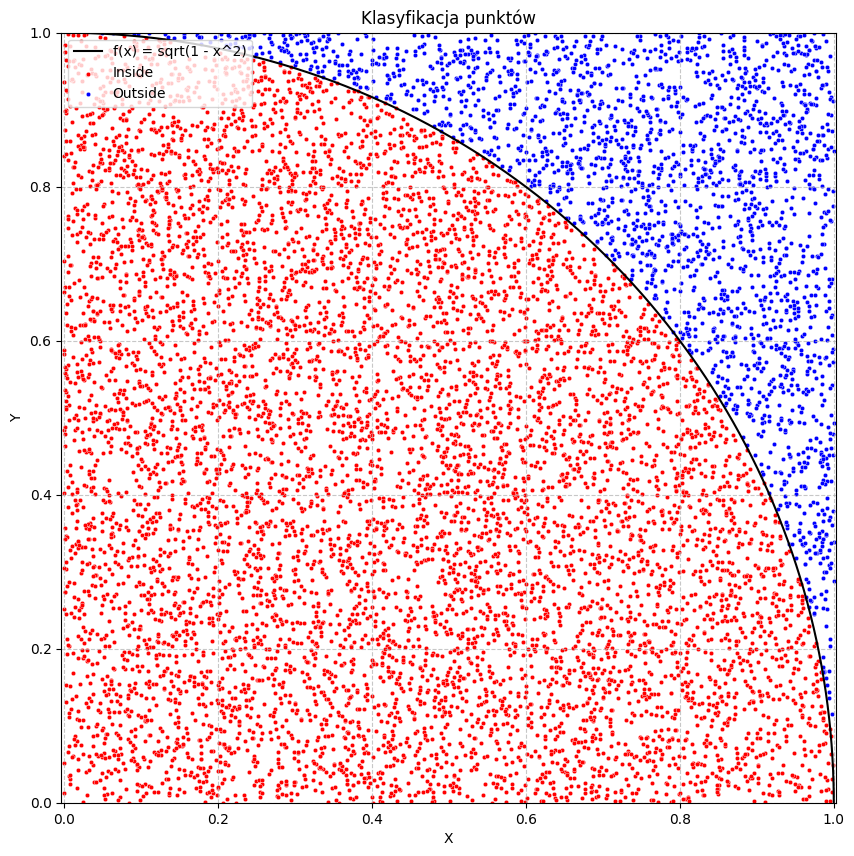

In [3]:
N = 10000
k, points_in, points_out = monte_carlo(N)
p_in = [[i for i, j in points_in],
       [j for i, j in points_in]]

p_out = [[i for i, j in points_out],
       [j for i, j in points_out]]

xx = np.linspace(0, 1, N)
yy = f(xx)

pi = 4 * k / N
print(f"Wartość π dla {N} punktów losowych wynosi {pi}")

plt.figure(figsize=(10,10))
sns.lineplot(x=xx, y=yy, color="black", label="f(x) = sqrt(1 - x^2)")
sns.scatterplot(x=p_in[0], y=p_in[1], s=10, color="red", label="Inside")
sns.scatterplot(x=p_out[0], y=p_out[1], s=10, color="blue", label="Outside")
plt.gca().set_aspect("equal", adjustable="datalim")
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Klasyfikacja punktów")
plt.legend(loc="upper left")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## Wizualizacja estymacji Pi w zależności od N

Przyjmujemy wartości N z zakresu od $[10 - 100000]$ z krokiem $10$, przy mniejszych wartościach początkowych widoczne były bardzo niedokładne wartości, przez co słabiej było widać co dzieje się wraz z wzrostem liczby punktów losowych, a przy mniejszym kroku wykres był mniej czytelny, a kod wykonaywał się bardzo długo, więc przyjąłem te wartości jako najbardziej optymalne.

Następnie tworzymy liniowy wykres estymacji wartośći liczby $π$ po wcześniejszym obliczeniu tych wartości dla kązdego z badanych $N$ wzorem $4*k/N$, aby uwzględnić całę pole okręgu. 
Dodałem linie poziomą pokazującą rzeczywistą wartość $π$ oraz dolną i górną granicę 95% przedziału ufności, który został obliczony na podstawie średniej i odchylenia standardowego estymacji $π$. Pokazują one zakres wartości, w którym spodziewamy się, że znajdzie się prawdziwa wartość liczby $π$.

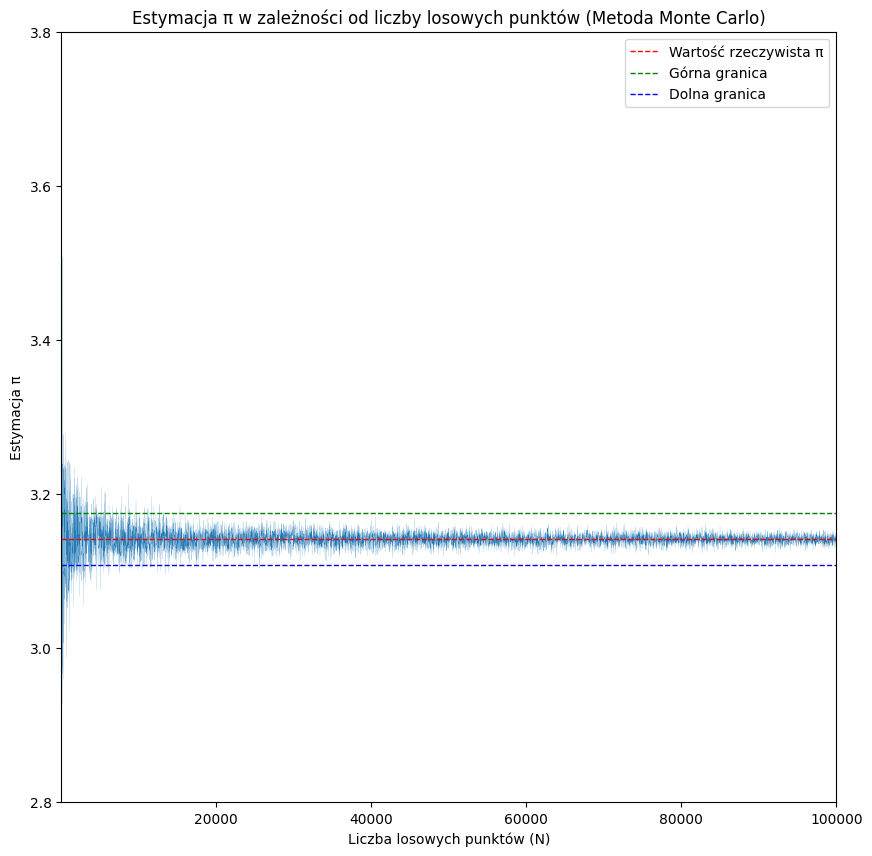

In [4]:
N_values = np.arange(10, 100000, 10)
pi_values = []

for N in N_values:
    k, _, _ = monte_carlo(N)
    pi = 4 * k / N
    pi_values.append(pi)


plt.figure(figsize=(10, 10))
plt.plot(N_values, pi_values, linestyle='-', linewidth=0.1)
plt.axhline(y=np.pi, color='r', linestyle='--', label='Wartość rzeczywista π', linewidth=1)

upper_bound = np.mean(pi_values) + 1.96 * np.std(pi_values)  # 95% przedział ufności
plt.axhline(y=upper_bound, color='g', linestyle='--', label='Górna granica', linewidth=1)

lower_bound = np.mean(pi_values) - 1.96 * np.std(pi_values)  # 95% przedział ufności
plt.axhline(y=lower_bound, color='b', linestyle='--', label='Dolna granica', linewidth=1)

plt.xlabel('Liczba losowych punktów (N)')
plt.ylabel('Estymacja π')
plt.title('Estymacja π w zależności od liczby losowych punktów (Metoda Monte Carlo)')
plt.xlim([10, 100000])
plt.ylim([min(pi_values), max(pi_values)])
plt.legend()
plt.show()

## Wykres błędu bezwzględnego

O liczamy wbłąd bezwzględny poprzez różnicę między estymowaną wartością a wartością rzeczywistą $π$ z wzoru $E = | V_{\text{oczekiwana}} - V_{\text{estymowana}} |$.

Pokazuje to jak bardzo wartość estymowana metodą Monte Carlo odbiegała od wartości rzeczywistej.

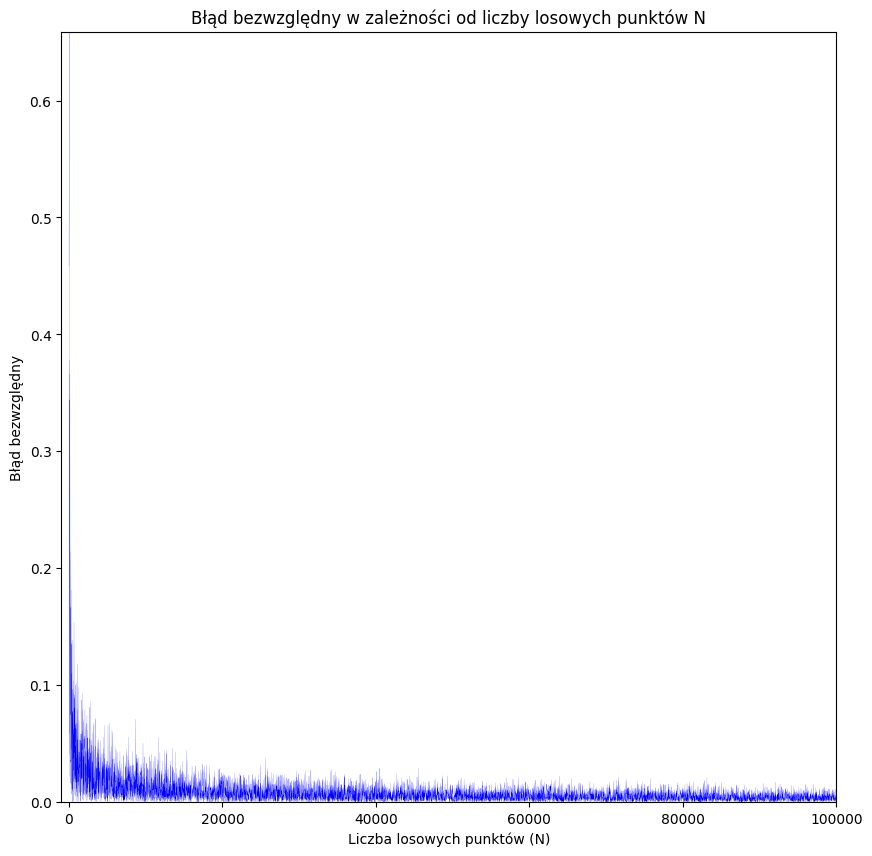

In [5]:
absolute_errors = np.abs(np.array(pi_values) - np.pi)

plt.figure(figsize=(10, 10))
plt.plot(N_values, absolute_errors, linestyle='-', linewidth=0.1, color='b')
plt.xlabel('Liczba losowych punktów (N)')
plt.ylabel('Błąd bezwzględny')
plt.title('Błąd bezwzględny w zależności od liczby losowych punktów N')
plt.xlim([-1000, 100000])
plt.ylim([0, max(absolute_errors)])

plt.show()

## Wykres pudełkowy

Tworzymy wykres pudełkowy dla 10 serii N o wartościach `N_series`, dodając linie przerywaną ozanaczającą wartość rzeczywistą $π$.

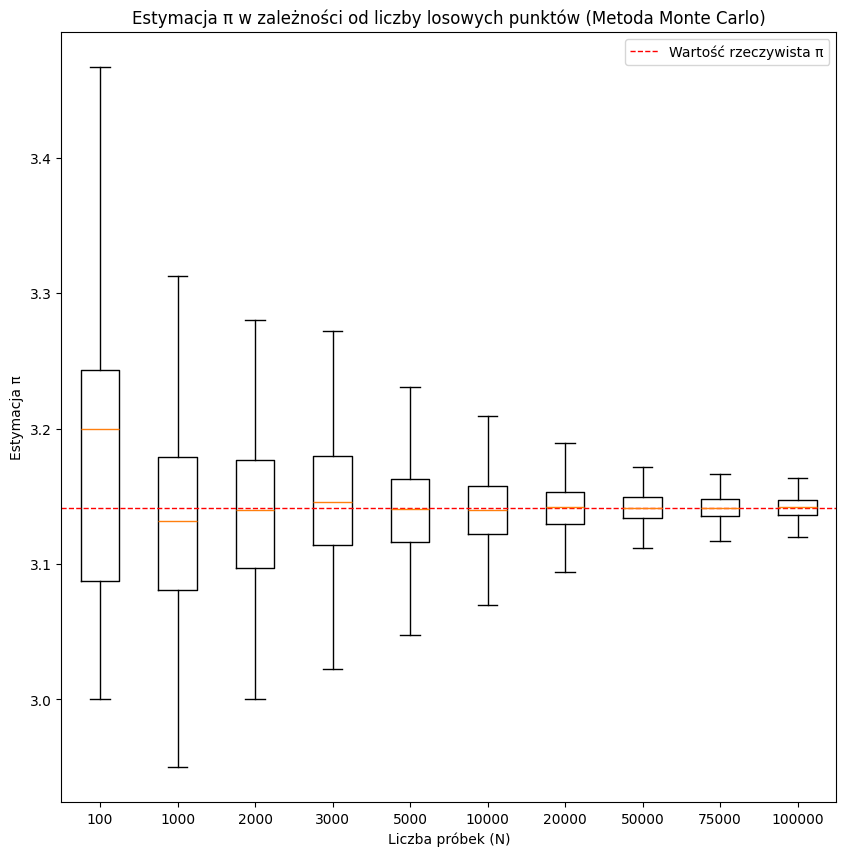

In [6]:
N_series = [100, 1000, 2000, 3000, 5000, 10000, 20000, 50000, 75000, 100000]
pi_values = [[] for _ in N_series]
for i, N_s in enumerate(N_series):
    pi_values_series = [] 
    for N in range(10, N_s + 1, 10):
        k, _, _ = monte_carlo(N)
        pi = 4 * k / N
        pi_values_series.append(pi)
    pi_values[i] = pi_values_series

plt.figure(figsize=(10, 10))
plt.boxplot(pi_values, labels=[str(N) for N in N_series], showfliers=False)
plt.axhline(y=np.pi, color='r', linestyle='--', label='Wartość rzeczywista π', linewidth=1)
plt.xlabel('Liczba próbek (N)')
plt.ylabel('Estymacja π')
plt.title('Estymacja π w zależności od liczby losowych punktów (Metoda Monte Carlo)')
plt.legend()

plt.show()

# Wnioski

Raczej oczywiste, na wykresach wyraźnie widoczne jest że wzrost liczby punktów losowych prowadzi do poprawy estymowanej wartości $π$.
Od około $N = 20000$ wartości miesczą się stale w dolnym i górnym 95% przedziale ufności.
Widać również, że znacząco maleje błąd bezwzględny.
Na wykresie pudełkowym widać, że po raz kolejny dl liczby $N = 20000$ punktów losowych średnia wartość pokrywa się z rzeczywistą wartością $π$.
Można, więc przyjąć że $N = 20000$ to minimalna wartość punktów losowych która da nam w miarę dokładne rozwiązanie tego problemu.